### **What is Data Discretization?**

**Data discretization** is the process of converting continuous features (numerical data) into discrete categories or bins. Each bin groups a range of values, simplifying the data and potentially making it easier for machine learning models to capture patterns.

For example, a continuous feature like "age" could be discretized into bins such as:
- `[0-18): Teenager`
- `[18-35): Young Adult`
- `[35+]: Adult`

---

### **Why Use Data Discretization?**

1. **Simplify Models**:
   - Reduces the complexity of data by grouping similar values.
   - Useful when exact continuous values are not critical for decision-making.

2. **Improve Interpretability**:
   - Easier for humans to understand models using categorical bins instead of raw numerical values.

3. **Handle Non-linear Relationships**:
   - Discretization can help models like linear regression approximate non-linear relationships.

4. **Enhance Performance in Certain Models**:
   - Tree-based models, for instance, can benefit from fewer unique feature values.

---

### **When to Use Data Discretization?**

1. **Non-linear Relationships**:
   - When continuous features have non-linear relationships with the target variable.

2. **Feature Engineering**:
   - When you want to create meaningful categories from continuous data (e.g., income levels, age groups).

3. **Reducing Sensitivity to Outliers**:
   - By grouping values, discretization can reduce the impact of extreme values.

4. **Interpretable ML**:
   - For use cases where the interpretability of models is crucial.

---

### **How to Perform Data Discretization in scikit-learn?**

scikit-learn provides the `KBinsDiscretizer` for discretization. Here's how to use it:

#### **1. Importing the Tool**
```python
from sklearn.preprocessing import KBinsDiscretizer
```

#### **2. Key Parameters**
- **`n_bins`**: Number of bins (categories) for each feature. Can be a single integer or a list/array specifying bins for each feature.
- **`encode`**:
  - `'ordinal'`: Encodes bins as integers (0, 1, 2, ...).
  - `'onehot'`: Encodes bins as a sparse one-hot matrix.
  - `'onehot-dense'`: Encodes bins as a dense one-hot matrix.
- **`strategy`**:
  - `'uniform'`: Equal-width bins.
  - `'quantile'`: Equal-frequency bins.
  - `'kmeans'`: Bins based on k-means clustering.

---

### **Example Usage**

#### **Discretizing a Single Feature**
```python
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

# Data
X = np.array([[1.5], [2.3], [3.1], [4.7], [5.2]])

# Discretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned = est.fit_transform(X)

print("Original Data:\n", X)
print("Discretized Data:\n", X_binned)
```

**Output:**
```
Original Data:
 [[1.5], [2.3], [3.1], [4.7], [5.2]]
Discretized Data:
 [[0.],
  [0.],
  [1.],
  [2.],
  [2.]]
```

#### **Discretizing Multiple Features**
```python
X = np.array([[1.5, 2.3], [3.1, 4.7], [5.2, 6.1]])

est = KBinsDiscretizer(n_bins=[3, 2], encode='onehot', strategy='quantile')
X_binned = est.fit_transform(X)

print("One-Hot Encoded Bins:\n", X_binned.toarray())
```

#### **Real-World Use Case**
Discretizing numerical features like income or age before feeding into a decision tree or logistic regression model.

---

### **Best Practices**

1. **Avoid Arbitrary Binning**:
   - Use domain knowledge or data-driven strategies (`quantile`, `kmeans`) to choose meaningful bins.

2. **Preprocess Before Discretizing**:
   - Scale or normalize your data if using strategies like `uniform` or `kmeans`.

3. **Experiment with Strategies**:
   - Test different `strategy` values (`uniform`, `quantile`, `kmeans`) to see what works best for your model.

4. **Consider Downstream Model Needs**:
   - Use `encode='onehot'` for linear models, or `encode='ordinal'` for tree-based models.

---


Choosing the right parameter (`strategy`, `encode`, etc.) in `KBinsDiscretizer` depends on the characteristics of your data and the specific machine learning (ML) task. Here's a guide on **when to use what** in the context of ML:

---

### **When to Use Specific `strategy` Values**
The choice of `strategy` for binning depends on how your data is distributed and the goal of binning:

#### 1. **`strategy="uniform"`**
- **When to use**: 
  - When you want equal-width bins (e.g., dividing the feature range into fixed intervals).
  - Useful when the data is roughly uniformly distributed.
- **Example use case**:
  - Binning ages into predefined age ranges like `[0-18), [18-35), [35-50)`.
- **Caution**: If the data is skewed, some bins may have very few or no samples.

---

#### 2. **`strategy="quantile"`**
- **When to use**:
  - When you want bins with an **equal number of samples**.
  - Useful when data is skewed or has outliers.
  - Helps avoid sparsely populated bins.
- **Example use case**:
  - Dividing income levels into low, middle, and high-income groups with equal group sizes.
- **Caution**: Can result in bins with different ranges if the data distribution is uneven.

---

#### 3. **`strategy="kmeans"`**
- **When to use**:
  - When you want bins that reflect natural groupings in the data.
  - Useful for **clustering-like tasks** or when the feature distribution is complex.
- **Example use case**:
  - Grouping customers based on spending habits.
- **Caution**: Computationally more expensive than `uniform` or `quantile`.

---

### **When to Use Specific `encode` Values**
The `encode` parameter determines how the binned data is represented, which impacts how the resulting data can be used in ML models.

#### 1. **`encode="ordinal"`**
- **When to use**:
  - When the bins have a natural order (e.g., small to large) that ML models can leverage.
  - When using tree-based models (e.g., decision trees, random forests, XGBoost), which can handle ordinal data well.
- **Example use case**:
  - Predicting house prices based on discretized income levels where `[0, 1, 2]` represent low, medium, and high income.
- **Caution**: For linear models, ordinal encoding might mislead the model if the bin indices are not proportional to the actual differences between bins.

---

#### 2. **`encode="onehot"`**
- **When to use**:
  - When you want to avoid introducing a false sense of order in the bins.
  - Suitable for linear models, logistic regression, or neural networks.
- **Example use case**:
  - Encoding product categories, where no category is "greater" than another.
- **Caution**: Increases the dimensionality of the feature space, which can affect model performance if you have many features.

---

#### 3. **`encode="onehot-dense"`**
- **When to use**:
  - Similar to `onehot`, but when the model or pipeline expects dense arrays instead of sparse matrices.
- **Example use case**:
  - Any use case where `encode="onehot"` applies but dense output is required (e.g., certain custom pipelines).
- **Caution**: Dense matrices consume more memory, especially with high-cardinality features.

---

### **General Tips for Choosing Parameters**
1. **Understand your data**:
   - Use `strategy="quantile"` for skewed or imbalanced data.
   - Use `strategy="uniform"` for approximately uniform data.
   - Use `strategy="kmeans"` for more complex distributions.

2. **Know your model**:
   - Use `encode="ordinal"` for tree-based models.
   - Use `encode="onehot"` for linear models or neural networks.

3. **Experiment**:
   - It's often worth trying different strategies and encodings to see what works best for your dataset and model.

In [92]:
import pandas as pd

data = [50, 20, 65, 80, 35, 5,  95]
bins = [0, 30, 70, 100]

labels = ['Low', 'Medium', 'High']

df = pd.DataFrame({'Value': data})
df['Category'] = pd.cut(df['Value'], bins=bins, labels=labels)

print(df)


   Value Category
0     50   Medium
1     20      Low
2     65   Medium
3     80     High
4     35   Medium
5      5      Low
6     95     High


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
df['age']=df['age'].fillna(df['age'].median())
df.head(20)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [94]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer=KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
df['age_category']=discretizer.fit_transform(df[['age']])


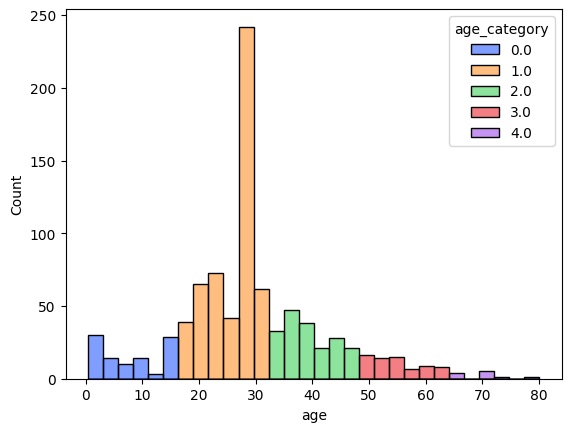

In [95]:
sns.histplot(df,x='age',hue='age_category',palette="bright")
plt.show()